Group: 31  
Members: Linus Kleine Kruthaup, Isabel Grauwelman, Mara Rehmer  
Week 2

# Multilayer Perceptron for Logical Gates

This week we will implement a Multi-layer Perceptron and train it to solve logical gates
and the XOR problem. To do so, we will implement backpropagation ourselves.

## 1 Preparation

• What is the purpose of an activation function in NN in general?

An activation function decides whether a neuron in the NN is activated by the input or not.
It maps the resulting values to values between 0 and 1. 

• What’s the advantage of e.g. sigmoid over the step function (threshold function)?

The sigmoid function is continuous. That is, it can take on values between 0 and 1 as well, whereas the step function can only take on 0 and 1 as discrete values. It also has a clearly defined derivative which we need for example for backpropagation.

• How does sigmoid look like (the formula as well as the graph)?

$ \sigma(x) = \frac{1}{1+e^{-x}} $ 

• What is the derivative of sigmoid?

$ \sigma'(x) = \frac{d}{dx} \sigma(x) = \frac{d}{dx} \frac{1}{1+e^{-x}} $  

$ \; \qquad = \frac{1}{1+e^{-x}} * (1 - \frac{1}{1+e^{-x}}) $  

$ \; \qquad = \sigma(x) * (1 - \sigma(x))$

Implement a function sigmoid(x) and a function sigmoidprime(x).

In [2]:
import numpy as np

# define the sigmoid activation function for later use
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

# also define its derivative as we will need it later as well
def sigmoidprime(x):
    s = (sigmoid(x) * (1 - sigmoid(x))
    return s

## 2 Data Set

The training data set will consist of possible **inputs** and their corresponding **labels**.
We are training the network on logical gates (and, or, not and, not or, xor = exclusive or). We will create the inputs and labels ourselves.

What are possible **inputs** to the logical gates? 

In [3]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])

For each of the logical gates you will need an array of **labels** or **targets** (= the true solution that
the network is supposed to output), one corresponding to each input pair.

In [4]:
# targets
t_and = np.array([1,0,0,0])
t_or = np.array([1,1,1,0])
t_nand = np.array([0,1,1,1])
t_nor = np.array([0,0,0,1])
t_xor = np.array([0,1,1,0])

## 3 Perceptron

Our multilayer-Perceptron will consist of single Perceptrons.
 So we will need a class
Perceptron. You can use the one that we have implemented together in the Flipped
Classroom Session (should also be uploaded) or create your own.
If you want to implement it yourself, think about what a Perceptron consists of. 3
When you create a Perceptron, it should receive an int input units with how many
weights are coming in to your Perceptron. It should also randomly assign weights and
the bias. 4 Also assign the learning rate alpha = 1.
The Perceptron should have a function forward step(self, inputs) that calculates
the activation of the perceptron. Use sigmoid as activation function.
Then you’ll need a function update(self, delta) which updates the parameters. To
do so, compute the gradients for weights and bias from the error term δ. (It was handed
over when the function was called in the backprop step function of the class MLP().)
Compute the gradients using:  
$ \frac{\partial L}{\partial w^{(l)}_{ij}} = \delta^{(l)}_i * a_j^{(l-1)} $

And then update the parameters using:  

$ \theta _{new} = \theta _{old} − \alpha \nabla L_{\theta} $

In [5]:
class Perceptron:
    """
    This class represents a single perceptron and can be used to build up a Multi-Layer Perceptron (MLP)
    """
    def __init__(self, input_units):
        
        self.input_units = input_units
        
        # initialize random weights and a random bias term
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        
        # define the learning rate as 1
        self.alpha = 1
    
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # calculate the drive
        # (you can use @ as a matrix multiplication command)
        weighted_sum =  self.weights @ input + self.bias
        
        # return drive and activation
        return weighted_sum, sigmoid(weighted_sum)
    
    def update(self, delta, input):
        # compute the gradient for the bias
        #('activation' of the bias is 1)
        gradient_bias = delta * 1
        # update the bias
        self.bias -= self.alpha * gradient_bias
        # compute the gradient for each weight and update
        gradient_weights = np.empty(len(self.weights))
        for i in range(len(self.weights)):
            gradient_weights[i] = delta * input[i]
            self.weights[i] -= self.alpha * gradient_weights[i]

## 4 Multi-Layer Perceptron

Further, we will need a class MLP() that can perform a forward and backprop-step.
Initialize the MLP with 1 hidden layer that has 4 Perceptrons. Initialize 1 output neuron. 
In the forward step process the inputs through the network.
In the backprop step update the parameters of the network.

In [6]:
class MLP:
    
    def __init__(self, input_units=2, hidden_perceptron_units=4):
        self.input_units = input_units
        self.hidden_perceptron_units = hidden_perceptron_units # number of perceptrons in the single hidden layer
        self.perceptrons = []
        
        # create Perceptron instances for the hidden layer and append them to the list
        for i in range(self.hidden_perceptron_units):
            self.perceptrons.append(Perceptron(self.input_units))
        
        # create a Perceptron instance for the output neuron that has as many inputs
        # as there are perceptrons in the hidden layer (one input from each perceptron)
        self.output_neuron = Perceptron(len(self.perceptrons))
        # create variables for the drive of the output neuron and its final output
        self.output : float
        self.drive_output : float
        # create empty arrays for the drive and the activations (outputs) of the perceptrons
        # in the hidden layer
        self.activations_hidden = np.empty(len(self.perceptrons))
        self.drive_hidden = np.empty(len(self.perceptrons))
            
    def forward_step(self, input):        
        # forward step for each perceptron in the hidden layer
        for i in range(len(self.perceptrons)):
            self.drive_hidden[i], self.activations_hidden[i] = self.perceptrons[i].forward_step(input)
            
        # forward step for the output neuron (using the activations/outputs from the hidden layer
        # that were calculated in the step before)
        self.drive_output, self.output = self.output_neuron.forward_step(self.activations_hidden)
        
        # return the final output
        return self.output
    
    def backprob_step(self, input, label):
        # calculate delta for the output neuron and update its weights and bias
        delta_output = -(label - self.output) * sigmoidprime(self.drive_output)
        self.output_neuron.update(delta_output, self.activations_hidden)
        # calculate delta for each hidden neuron and update its weights and bias
        # since we can directly access the output error because we only have one hidden layer,
        # we don't have to access the subsequent layer by incrementing the index (l+1)
        for i in range(len(self.perceptrons)):
            delta_hidden = delta_output * self.output_neuron.weights[i] * sigmoidprime(self.drive_hidden[i])
            self.perceptrons[i].update(delta_hidden, input)

## 5 Training
As a loss function for training we will use the squared error $(t − y)^2$. This loss is the
sigmoid output vs. the target. But as discussed in the lecture, we want to introduce an
additinal measurement of the performance of the network: This is the accuracy measure.
While the loss compares our pro As a threshold use 0.5. Meaning if the network outputs
a value bigger than 0.5 and the target is 1, it counts as a correct classification. If target
is 0 a correct classification will be a value smaller than 0.5 respectively.
Create an instance of the MLP class and train it for a 1000 epochs. One epoch is
looping over each point in your dataset once. Perform a forward and backward step for
each point in the dataset and record the loss and accuracy. For visualization you should
keep track of the epochs and the average loss and accuracy for each epoch.

In [21]:
# choose logical gate to train on
t = t_xor

# create an MLP instance 
# (2 input units and 4 perceptron units in the hidden layer were given in the assignment)
mlp = MLP(input_units=2, hidden_perceptron_units=4)

# create empty lists for the epochs, average loss and accuracies
epochs = []
avg_loss = []
accuracies = []


for i in range(1000): # (1000 epochs were given in the assignment)
    # for easy visualization later
    epochs.append(i)
    # draw a random sample from x and the corresponding t
    index = np.random.randint(len(x))
    sample = x[index]
    label = t[index]
    # perform a training step (consisting of the forward step and the backpropagation)
    mlp.forward_step(sample)
    mlp.backprob_step(sample, label)
    
    # calculate the performance over all four possible inputs
    accuracy_sum = 0
    loss_sum = 0
    for k in range(len(x)):
        # feed each input to the perceptron (only foward step!)
        output = mlp.forward_step(x[k])   
        # this turns true if the perceptron gave the right output (as given in the
        # assignment), then adds 1 to the accuracy sum
        accuracy_sum += int(((output > 0.5) and (t[k] == 1)) or ((output < 0.5) and (t[k] == 0)))
        # calculates the loss as given in the assignment
        loss_sum += (t[k] - output)**2
    # divide through all the training examples to obtain the average accuracy and loss
    accuracy = accuracy_sum / len(x)                  
    accuracies.append(accuracy)
    loss = loss_sum / len(x)
    avg_loss.append(loss)

In [22]:
# We can get an overview of our results 
# If we increase the number of epochs, we see a more accurate and persistent prediction of the MLP
for n in range(len(x)):
    output = mlp.forward_step(x[n])
    print("Input: ", np.array2string(x[n]),  " \t True Label: ", t[n], " \t MLP's Prediction: ", round(output, 5))

Input:  [1 1]  	 True Label:  0  	 MLP's Prediction:  0.65114
Input:  [1 0]  	 True Label:  1  	 MLP's Prediction:  0.60169
Input:  [0 1]  	 True Label:  1  	 MLP's Prediction:  0.88073
Input:  [0 0]  	 True Label:  0  	 MLP's Prediction:  0.17065


## 6 Visualization
Visualize the training progress using matplotlib. Create one graph with the epochs on
the x-axis and the average loss per epoch on the y-axis. Do the same for the average
accuracy per epoch. If your MLP trained correctly the loss should come down to zero
and the accuracy should go up to 1 in most cases. Due to random weight initialisation
the accuracy might not reach 1 sometimes. In that case just rerun the MLP initialisation
and the training.

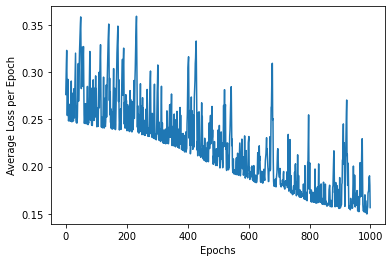

<function matplotlib.pyplot.show(close=None, block=None)>

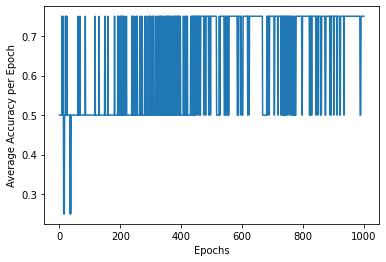

In [23]:
import matplotlib.pyplot as plt

# we visualize the average loss per epoch
plt.figure()
plt.plot(epochs, avg_loss)
plt.xlabel("Epochs")
plt.ylabel("Average Loss per Epoch")
plt.show()

# we visualize the average accuracy per epoch
plt.figure()
plt.plot(epochs, accuracies)
plt.xlabel("Epochs")
plt.ylabel("Average Accuracy per Epoch")
plt.show